## Reproduce Bug Error - Tuned_Model does not return Optimized model

In [1]:
# !pip install pycaret

In [2]:
from pycaret.regression import *

In [3]:
pycaret.__version__

'2.3.5'

In [4]:
%matplotlib inline

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

In [6]:
DELANEY_URL = "https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/delaney-processed.csv"
DELANEY_TARGET = ['measured log solubility in mols per litre']


In [7]:
# df = pd.read_csv('data/delaney-processed.csv')
df = pd.read_csv(DELANEY_URL)

In [8]:
df

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.770,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.300,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.060,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.870,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.330,c1ccsc1
...,...,...,...,...,...,...,...,...,...,...
1123,halothane,-2.608,1,197.381,0,0,0,0.00,-1.710,FC(F)(F)C(Cl)Br
1124,Oxamyl,-0.908,1,219.266,1,0,1,71.00,0.106,CNC(=O)ON=C(SC)C(=O)N(C)C
1125,Thiometon,-3.323,1,246.359,0,0,7,18.46,-3.091,CCSCCSP(=S)(OC)OC
1126,2-Methylbutane,-2.245,1,72.151,0,0,1,0.00,-3.180,CCC(C)C


In [9]:
col_df = df.columns
col_df

Index(['Compound ID', 'ESOL predicted log solubility in mols per litre',
       'Minimum Degree', 'Molecular Weight', 'Number of H-Bond Donors',
       'Number of Rings', 'Number of Rotatable Bonds', 'Polar Surface Area',
       'measured log solubility in mols per litre', 'smiles'],
      dtype='object')

In [10]:
df.shape

(1128, 10)

In [11]:
df.isna().sum()

Compound ID                                        0
ESOL predicted log solubility in mols per litre    0
Minimum Degree                                     0
Molecular Weight                                   0
Number of H-Bond Donors                            0
Number of Rings                                    0
Number of Rotatable Bonds                          0
Polar Surface Area                                 0
measured log solubility in mols per litre          0
smiles                                             0
dtype: int64

In [12]:
df_small = df.sample(n=139, random_state=1)
df_small

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
472,Methyl decanoate,-3.316,1,186.295,0,0,8,26.30,-4.690,CCCCCCCCCC(=O)OC
582,Perfluidone,-4.945,1,379.381,1,2,4,80.31,-3.800,Cc1cc(ccc1NS(=O)(=O)C(F)(F)F)S(=O)(=O)c2ccccc2
483,Amitrole,-0.674,1,84.082,2,1,0,67.59,0.522,Nc1nc[nH]n1
908,"2,3',4,4',5-PCB",-7.343,1,360.882,0,2,1,0.00,-7.390,Clc1ccc(c(Cl)c1)c2cc(Cl)c(Cl)c(Cl)c2Cl
814,Ethyl benzoate,-2.775,1,150.177,0,1,2,26.30,-2.320,CCOC(=O)c1ccccc1
47,brompyrazone,-3.005,1,266.098,1,2,1,60.91,-3.127,c1ccccc1n2ncc(N)c(Br)c2(=O)
81,4-methylpteridine,-1.240,1,146.153,0,2,0,51.56,-0.466,Cc1ncnc2nccnc12
432,Dienochlor,-7.848,1,474.640,0,2,1,0.00,-7.278,ClC1=C(Cl)C(Cl)(C(=C1Cl)Cl)C2(Cl)C(=C(Cl)C(=C2...
248,Triazolam,-3.948,1,343.217,0,4,1,43.07,-4.090,Cc3nnc4CN=C(c1ccccc1Cl)c2cc(Cl)ccc2n34
1087,Sulfallate,-3.254,1,223.794,0,0,4,3.24,-3.390,CCN(CC)C(=S)SCC(Cl)=C


In [13]:
# chemical only
selection = ["Molecular Weight","Polar Surface Area",
#              "ESOL predicted log solubility in mols per litre",
             "Number of H-Bond Donors",
             "Number of Rings", 
             "measured log solubility in mols per litre"]

df_test = df_small[selection]
X = df_test.drop(columns="measured log solubility in mols per litre")
Y = df_test["measured log solubility in mols per litre"]
dataset = pd.concat([X,Y], axis=1)
dataset.head()

,Molecular Weight,Polar Surface Area,Number of H-Bond Donors,Number of Rings,measured log solubility in mols per litre
472,186.295,26.30,0,0,-4.690
582,379.381,80.31,1,2,-3.800
483,84.082,67.59,2,1,0.522
908,360.882,0.00,0,2,-7.390
814,150.177,26.30,0,1,-2.320


In [14]:
start_up = setup(data = dataset, target = "measured log solubility in mols per litre", 
                 train_size=0.8, silent=True, preprocess=False)

,Description,Value
0,session_id,2057
1,Target,measured log solubility in mols per litre
2,Original Data,"(139, 5)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,2
6,Transformed Train Set,"(111, 4)"
7,Transformed Test Set,"(28, 4)"
8,Shuffle Train-Test,True
9,Stratify Train-Test,False


In [15]:
set_config('seed', 7460)

In [16]:
model_type = 'rf'
model = create_model(model_type)

tuned_model = tune_model(model, n_iter = 20, optimize = 'r2', choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6163,0.6310,0.7943,0.6783,0.3004,0.5962
1,1.1631,2.3804,1.5429,0.2994,0.5092,1.5096
2,0.9786,1.4818,1.2173,0.7048,0.2378,0.3050
3,0.5941,0.8741,0.9349,0.7577,0.3930,2.2917
4,0.6969,0.7770,0.8815,0.8418,0.2287,0.7521
5,0.7568,0.8578,0.9262,0.6980,0.1688,0.3464
6,1.0264,1.4418,1.2007,0.4838,0.3327,0.5931
7,0.9077,2.0484,1.4312,0.7095,0.2157,0.1754
8,1.2272,3.1474,1.7741,0.5250,0.3865,0.5047
9,0.7813,0.9434,0.9713,0.5833,0.2726,0.4013


In [17]:
pull()

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6163,0.6310,0.7943,0.6783,0.3004,0.5962
1,1.1631,2.3804,1.5429,0.2994,0.5092,1.5096
2,0.9786,1.4818,1.2173,0.7048,0.2378,0.3050
3,0.5941,0.8741,0.9349,0.7577,0.3930,2.2917
4,0.6969,0.7770,0.8815,0.8418,0.2287,0.7521
5,0.7568,0.8578,0.9262,0.6980,0.1688,0.3464
6,1.0264,1.4418,1.2007,0.4838,0.3327,0.5931
7,0.9077,2.0484,1.4312,0.7095,0.2157,0.1754
8,1.2272,3.1474,1.7741,0.5250,0.3865,0.5047
9,0.7813,0.9434,0.9713,0.5833,0.2726,0.4013


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


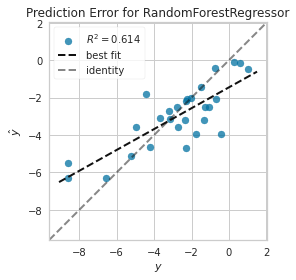

In [18]:
plot_model(tuned_model, plot='error')

In [19]:
pull().sort_values('R2', ascending=False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
4,0.6969,0.7770,0.8815,0.8418,0.2287,0.7521
3,0.5941,0.8741,0.9349,0.7577,0.3930,2.2917
7,0.9077,2.0484,1.4312,0.7095,0.2157,0.1754
2,0.9786,1.4818,1.2173,0.7048,0.2378,0.3050
5,0.7568,0.8578,0.9262,0.6980,0.1688,0.3464
0,0.6163,0.6310,0.7943,0.6783,0.3004,0.5962
Mean,0.8748,1.4583,1.1674,0.6282,0.3045,0.7476
9,0.7813,0.9434,0.9713,0.5833,0.2726,0.4013
8,1.2272,3.1474,1.7741,0.5250,0.3865,0.5047
6,1.0264,1.4418,1.2007,0.4838,0.3327,0.5931


In [20]:
tuned_model

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.005,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=-1, oob_score=False,
                      random_state=2057, verbose=0, warm_start=False)

In [21]:
plot_model(tuned_model, plot='parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
criterion,mse
max_depth,9
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.005
min_impurity_split,None
min_samples_leaf,2


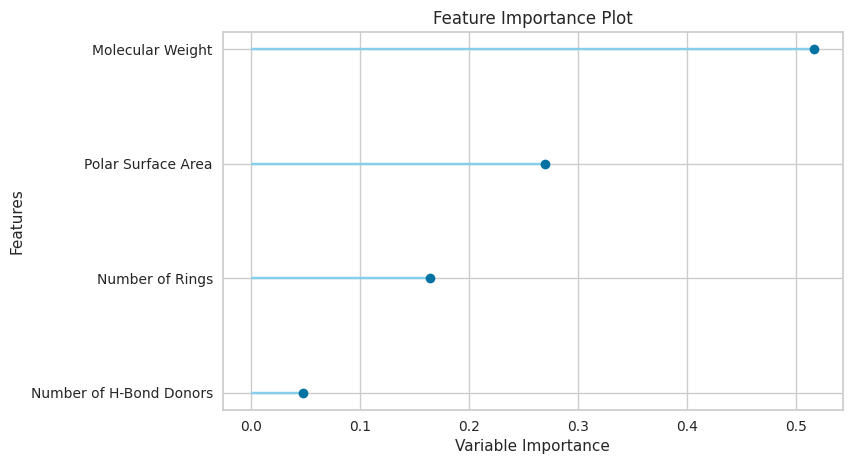

In [22]:
plot_model(tuned_model, plot='feature')

In [23]:
from pycaret.regression import get_leaderboard

leaderboard = get_leaderboard()

In [24]:
leaderboard

,Model Name,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
Index,,,,,,,,
0,Random Forest Regressor,"(DataTypes_Auto_infer(categorical_features=[],...",0.8903,1.5488,1.1835,0.6004,0.3228,0.7404
1,Random Forest Regressor,"(DataTypes_Auto_infer(categorical_features=[],...",0.8748,1.4583,1.1674,0.6282,0.3045,0.7476
2,Random Forest Regressor,"(DataTypes_Auto_infer(categorical_features=[],...",0.8903,1.5488,1.1835,0.6004,0.3228,0.7404


In [25]:
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Custom
ID,,,,,,,,
mae,MAE,MAE,<function mean_absolute_error at 0x7f8f208914c0>,neg_mean_absolute_error,pred,{},False,False
mse,MSE,MSE,<function mean_squared_error at 0x7f8f208915e0>,neg_mean_squared_error,pred,{},False,False
rmse,RMSE,RMSE,<function mean_squared_error at 0x7f8f208915e0>,neg_root_mean_squared_error,pred,{'squared': False},False,False
r2,R2,R2,<function r2_score at 0x7f8f20891a60>,r2,pred,{},True,False
rmsle,RMSLE,RMSLE,<function RMSLEMetricContainer.__init__.<local...,"make_scorer(root_mean_squared_log_error, great...",pred,{},False,False
mape,MAPE,MAPE,<function MAPEMetricContainer.__init__.<locals...,"make_scorer(mean_absolute_percentage_error, gr...",pred,{},False,False


In [26]:
pred_holdout = predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,1.0999,2.1959,1.4818,0.6144,0.4015,0.8593


In [27]:
get_config('seed')

7460

In [28]:
get_config('fold_generator')

KFold(n_splits=10, random_state=None, shuffle=False)

In [29]:
get_config('X_train')

,Molecular Weight,Polar Surface Area,Number of H-Bond Donors,Number of Rings
133,160.169006,52.599998,0,0
892,130.231003,20.230000,1,0
34,180.250000,0.000000,0,3
47,266.097992,60.910000,1,2
388,102.177002,20.230000,1,0
...,...,...,...,...
854,147.003998,0.000000,0,1
900,303.156006,75.269997,2,1
85,236.740005,0.000000,0,0
248,343.217010,43.070000,0,4


In [30]:
get_config('X_test')

,Molecular Weight,Polar Surface Area,Number of H-Bond Donors,Number of Rings
671,55.080002,23.790001,0,0
1014,214.205994,88.370003,1,2
736,242.320999,0.000000,0,4
943,117.151001,15.790000,1,2
189,109.127998,46.250000,2,1
267,137.020004,0.000000,0,0
573,142.585007,9.230000,0,1
814,150.177002,26.299999,0,1
181,376.496002,27.690001,0,3
834,136.194000,20.230000,1,1


In [31]:
start_up

(      Molecular Weight  Polar Surface Area  Number of H-Bond Donors  \
 472            186.295               26.30                        0   
 582            379.381               80.31                        1   
 483             84.082               67.59                        2   
 908            360.882                0.00                        0   
 814            150.177               26.30                        0   
 ...                ...                 ...                      ...   
 726            136.150               26.30                        0   
 403            129.384                0.00                        0   
 156            148.205               20.23                        1   
 579            230.310                0.00                        0   
 1032           197.448               20.23                        1   
 
       Number of Rings  measured log solubility in mols per litre  
 472                 0                                     -4.690 